In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
import os
import statsmodels.api as sm

## Paso 1: Obtener los datos de créditos Mi Vivienda

In [5]:
# Ruta de la carpeta que contiene los archivos CSV
carpeta = "Data/"

In [6]:
# Crear una lista para almacenar los DataFrames de cada archivo
dataframes = []

In [8]:
# Iterar a través de los archivos en la carpeta
for archivo_nombre in os.listdir(carpeta):
    if archivo_nombre.endswith(".csv"):
        archivo_ruta = os.path.join(carpeta, archivo_nombre)
        año = int(archivo_nombre.split("Data_NCMV_")[1].split(".")[0])  # Obtener el año
        df = pd.read_csv(archivo_ruta)
        df["Año"] = año  # Agregar la columna del año
        dataframes.append(df)

In [9]:
# Combinar los DataFrames en uno solo
data_combinada = pd.concat(dataframes, ignore_index=True)

In [11]:
# Exploración inicial de los datos
print(data_combinada.head())
print(data_combinada.info())
print(data_combinada.describe())

   FECHA_DESEMBOLSO PRODUCTO DEPARTAMENTO PROVINCIA       DISTRITO  UBIGEO  \
0          20180104     FCTP          ICA       ICA   LA TINGUINIA  110102   
1          20180104     NCMV        PIURA  MORROPON     CHULUCANAS  200401   
2          20180105     FCTP        PIURA     PIURA  26 DE OCTUBRE  200115   
3          20180105     FCTP        PIURA     PIURA  26 DE OCTUBRE  200115   
4          20180105     FCTP        PIURA     PIURA  26 DE OCTUBRE  200115   

              IFI    TIPO_IFI  MONTO_CREDITO  MONTO_CUOTA_INICIAL  PLAZOS  \
0  FINANCIERA TFC  FINANCIERA       29800.00              6800.00     120   
1  FINANCIERA TFC  FINANCIERA       42500.00              6500.00     120   
2    CMAC SULLANA        CMAC       37350.00              7750.00      96   
3    CMAC SULLANA        CMAC       32450.00             14150.00      96   
4    CMAC SULLANA        CMAC       37650.01              8949.99     180   

   TASA  MONTO_VALOR_VIVIENDA  FECHA_CORTE   Año  
0  14.5          

In [12]:
# Guardamos el dataframe data_combinada en un csv
data_combinada.to_csv('Data/Data_NCMV.csv', index=False, encoding='utf-8')

In [13]:
data_ncmv_df = pd.read_csv('Data/Data_NCMV.csv').fillna('')
data_ncmv_df.head(20)

,FECHA_DESEMBOLSO,PRODUCTO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,IFI,TIPO_IFI,MONTO_CREDITO,MONTO_CUOTA_INICIAL,PLAZOS,TASA,MONTO_VALOR_VIVIENDA,FECHA_CORTE,Año
0,20180104,FCTP,ICA,ICA,LA TINGUINIA,110102,FINANCIERA TFC,FINANCIERA,29800.00,6800.00,120,14.50,68000.00,20230811,2018
1,20180104,NCMV,PIURA,MORROPON,CHULUCANAS,200401,FINANCIERA TFC,FINANCIERA,42500.00,6500.00,120,13.50,65000.00,20230811,2018
2,20180105,FCTP,PIURA,PIURA,26 DE OCTUBRE,200115,CMAC SULLANA,CMAC,37350.00,7750.00,96,14.00,77500.00,20230811,2018
3,20180105,FCTP,PIURA,PIURA,26 DE OCTUBRE,200115,CMAC SULLANA,CMAC,32450.00,14150.00,96,14.00,79000.00,20230811,2018
4,20180105,FCTP,PIURA,PIURA,26 DE OCTUBRE,200115,CMAC SULLANA,CMAC,37650.01,8949.99,180,14.00,79000.00,20230811,2018
5,20180105,FCTP,PIURA,PIURA,26 DE OCTUBRE,200115,CMAC SULLANA,CMAC,38000.01,8599.99,180,14.00,79000.00,20230811,2018
6,20180105,FCTP,ANCASH,SANTA,NUEVO CHIMBOTE,21801,FINANCIERA TFC,FINANCIERA,37470.00,2130.00,144,14.50,71000.00,20230811,2018
7,20180105,FCTP,PIURA,PIURA,26 DE OCTUBRE,200115,CMAC SULLANA,CMAC,33000.00,10600.00,144,14.00,76000.00,20230811,2018
8,20180105,FCTP,ICA,ICA,SUBTANJALLA,110112,FINANCIERA TFC,FINANCIERA,31864.00,2636.00,180,14.50,65900.00,20230811,2018
9,20180105,FCTP,PIURA,PIURA,PIURA,200101,FINANCIERA TFC,FINANCIERA,36378.97,3000.00,180,14.50,66423.97,20230811,2018


## Paso 2: Limpieza de datos

In [14]:
# Tratar valores faltantes
data_ncmv_df.dropna(inplace=True)  # Eliminar filas con valores faltantes

In [15]:
# Convertir columnas relevantes a tipos de datos adecuados
data_ncmv_df['FECHA_DESEMBOLSO'] = pd.to_datetime(data_ncmv_df['FECHA_DESEMBOLSO'], format='%Y%m%d')
data_ncmv_df['FECHA_CORTE'] = pd.to_datetime(data_ncmv_df['FECHA_CORTE'], format='%Y%m%d')

In [18]:
# Mostrar estadísticas descriptivas de las columnas numéricas
print(data_ncmv_df.describe())
print(data_ncmv_df.info())

              UBIGEO  MONTO_CREDITO  MONTO_CUOTA_INICIAL        PLAZOS  \
count   56108.000000   56108.000000         56108.000000  56108.000000   
mean   141878.985902  143277.832925         30490.836867    198.816497   
std     36554.867243   89445.996579         23019.670316     59.295449   
min     10101.000000    4000.000000             0.000000      0.000000   
25%    131201.000000   74000.000000         14600.000000    150.000000   
50%    150110.000000  121200.000000         24710.000000    240.000000   
75%    150128.000000  198602.475000         40150.000000    240.000000   
max    250107.000000  429385.000000        334420.380000    300.000000   

               TASA  MONTO_VALOR_VIVIENDA           Año  
count  56108.000000          56108.000000  56108.000000  
mean       9.758499         191921.094960   2020.167053  
std        2.391523          95879.428555      1.426256  
min        5.000000          42500.000000   2018.000000  
25%        8.200000         117500.000000  

## Paso 3: Evaluación

### 3.1 Análisis de tendencia temporales

In [156]:
# Analizaremos cómo ha evolucionado el número de créditos otorgados a lo largo de los años (columna "Año"). 
# Esto puede ayudar a identificar si ha habido un aumento o disminución en la demanda de créditos de vivienda en la comunidad.

In [157]:
# Convertir la columna de fecha en el índice del DataFrame
data_ncmv_df.set_index('FECHA_DESEMBOLSO', inplace=True)

In [158]:
# Agrupar los datos por año y contar la cantidad de créditos por año
credits_per_year = data_ncmv_df.resample('Y').size()

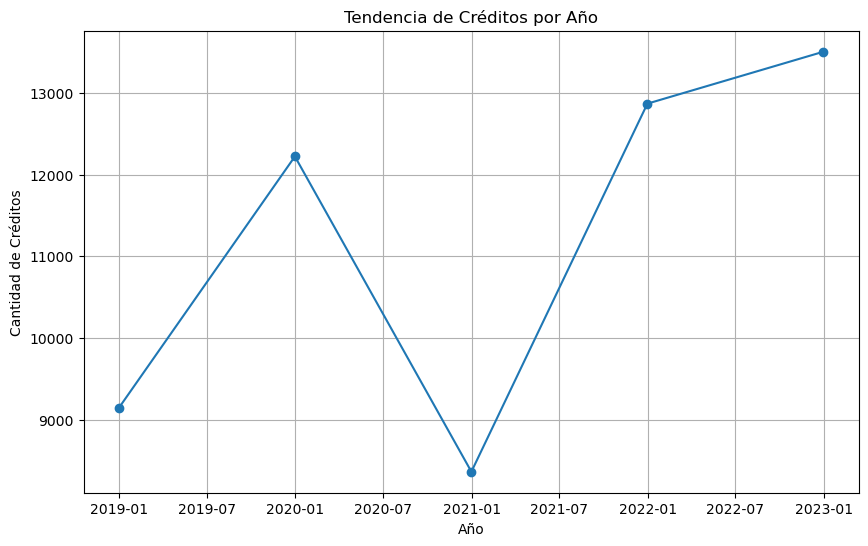

In [159]:
# Crear un gráfico de tendencias temporales
## Ancho 10 y Altura 6 pulgadas
plt.figure(figsize=(10, 6))
plt.plot(credits_per_year.index, credits_per_year.values, marker='o')
plt.title('Tendencia de Créditos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Créditos')
plt.grid(True)
plt.show()

### 3.2 Distribución geográfica

In [160]:
## Calcularemos el valor promedio de vivienda por departamento

In [161]:
# Calcular el valor promedio de la vivienda por departamento
pivot_table = data_ncmv_df.pivot_table(values='MONTO_VALOR_VIVIENDA', index='DEPARTAMENTO', aggfunc='mean')

In [162]:
# Ordenar los departamentos por valor promedio de vivienda
pivot_table = pivot_table.sort_values(by='MONTO_VALOR_VIVIENDA', ascending=False)

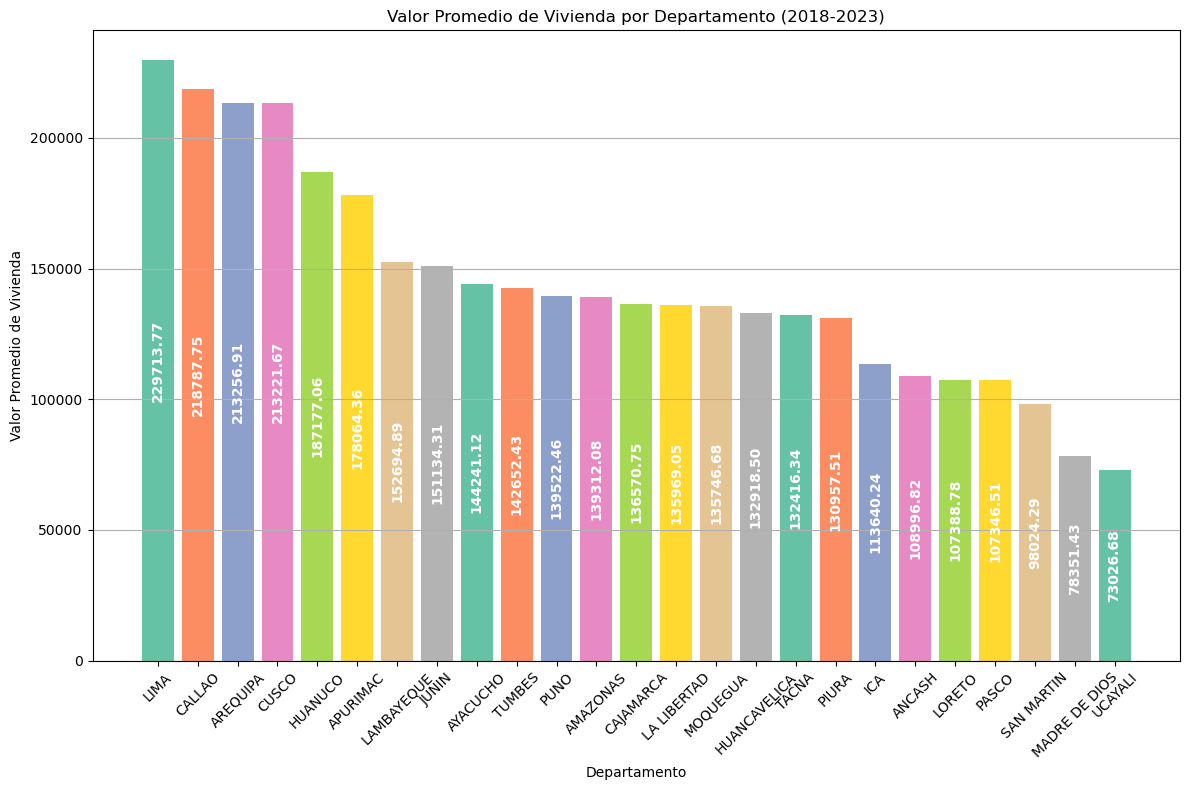

In [163]:
# Crear un gráfico de barras
plt.figure(figsize=(12, 8))

# Utilizar la paleta de colores "Set2" de Seaborn
colors = sns.color_palette("Set2", len(pivot_table))

# Crear el gráfico de barras
bars = plt.bar(pivot_table.index, pivot_table['MONTO_VALOR_VIVIENDA'], color=colors)

# Agregar título y etiquetas
plt.title('Valor Promedio de Vivienda por Departamento (2018-2023)')
plt.xlabel('Departamento')
plt.ylabel('Valor Promedio de Vivienda')
plt.xticks(rotation=45)

# Agregar etiquetas para cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{bar.get_height():.2f}',
             ha='center', va='center', rotation=90, color='white', fontweight='bold')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 3.3 Análisis de productos

In [ ]:
## En esta sección analizaremos los productos que ofrece Crédito Mi Vivienda.

In [141]:
# Obtener la cantidad total de créditos por producto
product_counts = data_ncmv_df['PRODUCTO'].value_counts()

Text(0.5, 1.0, 'Productos más Populares')

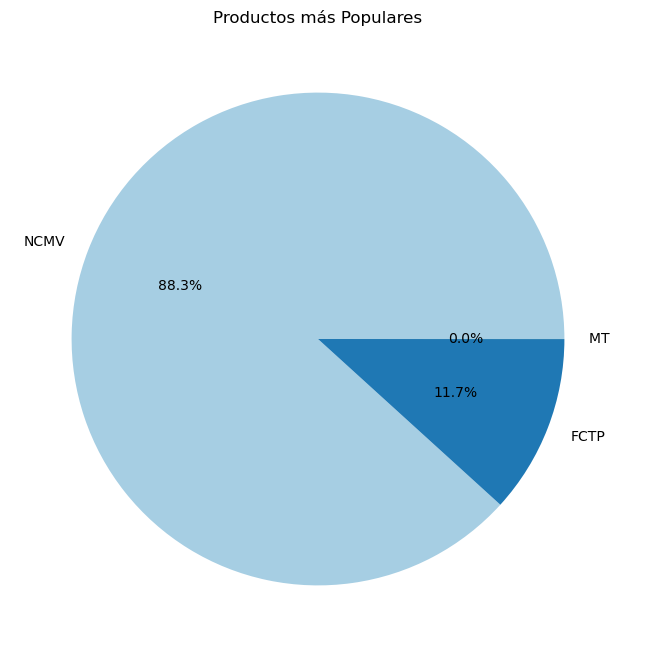

In [104]:
# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Productos más Populares')

## 3.4 Relación entre tipo de Entidad Financiera, Tasa de interés y valor de la vivienda

In [ ]:
## Nos proporcionará una representación visual de cómo se relacionan las tasas de interés, los valores de vivienda y 
## las instituciones financieras. Esta información es valiosa para la toma de decisiones estratégicas y la comprensión del 
## mercado hipotecario.

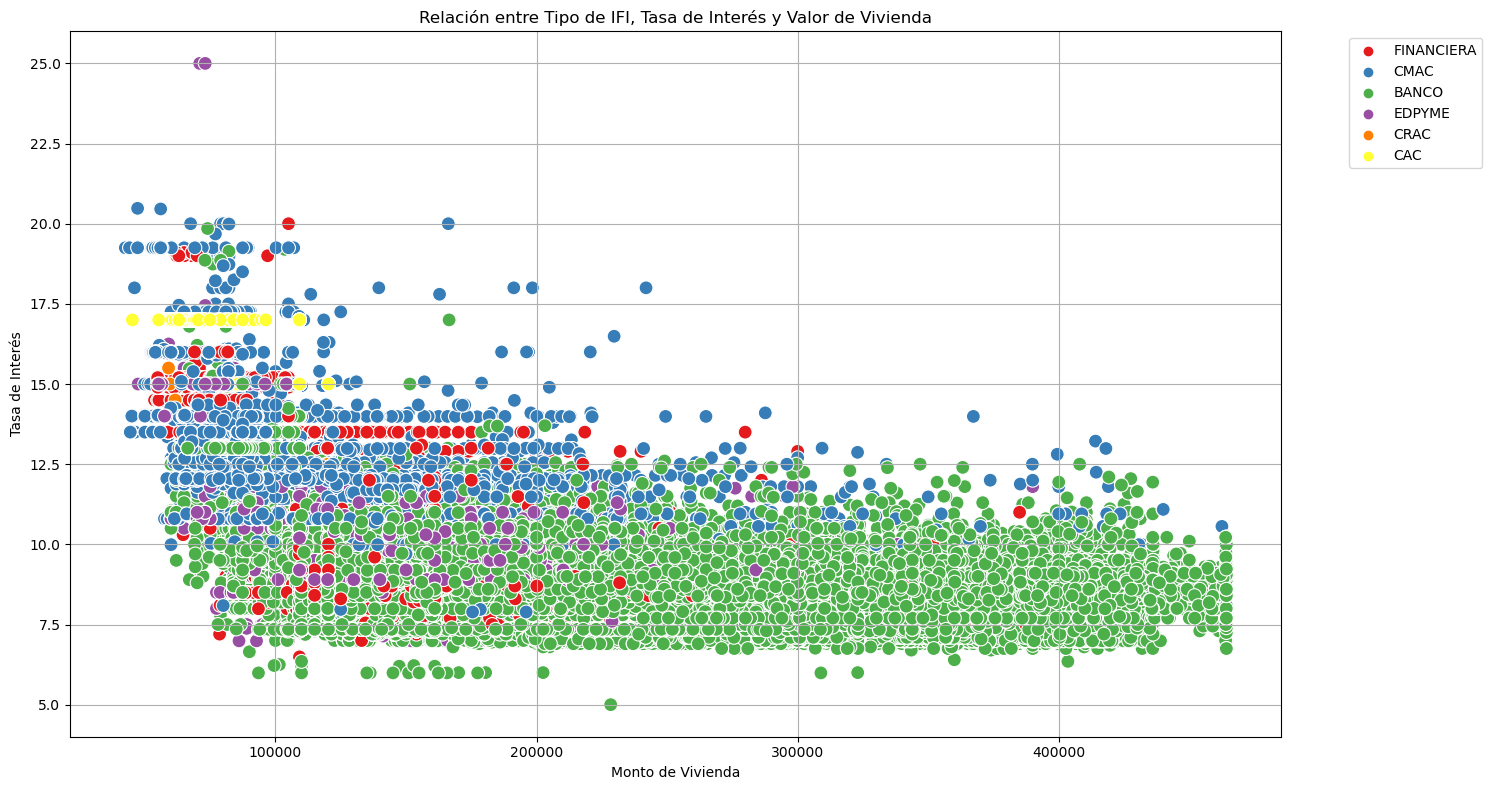

In [164]:
# Gráfico de dispersión con Seaborn
plt.figure(figsize=(15, 8))

# Gráfico de dispersión utilizando la paleta de colores "Set1"
scatter = sns.scatterplot(data=data_ncmv_df, x='MONTO_VALOR_VIVIENDA', y='TASA', hue='TIPO_IFI', palette='Set1', s=100)

# Agregar título y etiquetas
plt.title('Relación entre Tipo de IFI, Tasa de Interés y Valor de Vivienda')
plt.xlabel('Monto de Vivienda')
plt.ylabel('Tasa de Interés')

# Ajustar leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()

plt.show()

## 3.5 Variación de tasas por ubicación

In [ ]:
## Comprenderemos las tendencias geográficas y temporales de las tasas de interés, 
## lo que puede influir en la toma de decisiones estratégicas.

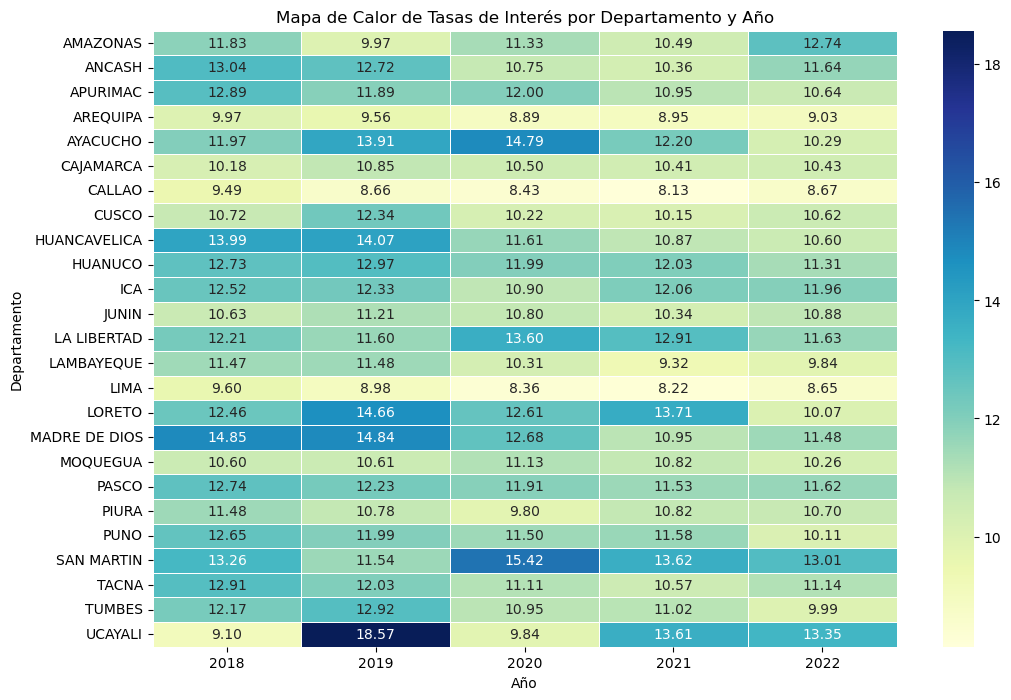

In [25]:
# Crea una tabla pivote con tasas de interés promedio por departamento y año
pivot_table = data_ncmv_df.pivot_table(values='TASA', index='DEPARTAMENTO', columns='Año', aggfunc='mean')

# Crea un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Tasas de Interés por Departamento y Año')
plt.xlabel('Año')
plt.ylabel('Departamento')
plt.show()

## 3.6 Plotear Word Cloud de Instituciones Financieras

In [ ]:
## Daremos a conocer a las instituciones más relevantes y proporcionar información valiosa para la toma de decisiones 
## estratégicas, la gestión de relaciones y la identificación de patrones en los datos relacionados con instituciones 
## financieras.

In [6]:
# Concatenamos los valores de la columna IFI
ifi_text = ' '.join(data_ncmv_df['IFI'].astype(str))

In [7]:
# Crear el Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ifi_text)

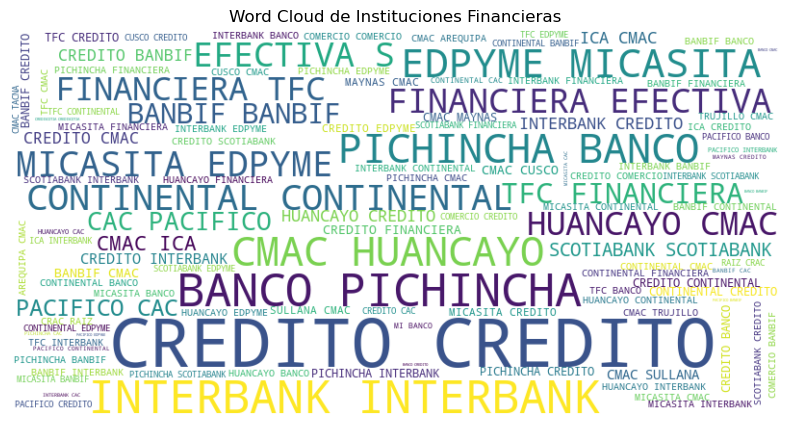

In [12]:
# Mostrar el Word Cloud utilizando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.title('Word Cloud de Instituciones Financieras')
plt.show()